In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pylab as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

**Load Data set**

In [2]:
df = pd.read_csv('data/USvideos.csv')

**Preprocess Data**

In [3]:
# drop the 'video_id' since unique
# df.drop(columns=['video_id'],inplace=True)
print("Data Frame shape: ", df.shape)
print(df.nunique())

# change catagory_id to catagory name
print(df['category_id'].unique())
df['category_name'] = np.nan

df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 43),"category_name"] = 'Shows'

df.drop(columns=['category_id'],inplace=True)

Data Frame shape:  (40949, 16)
video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64
[22 24 23 28  1 25 17 10 15 27 26  2 19 20 29 43]


**Check missing values**

In [4]:
print(df.isnull().sum(axis=0)/df.shape[0])
print(sum(df.isnull().sum(axis=1)!=0)/df.shape[0])

video_id                  0.00000
trending_date             0.00000
title                     0.00000
channel_title             0.00000
publish_time              0.00000
tags                      0.00000
views                     0.00000
likes                     0.00000
dislikes                  0.00000
comment_count             0.00000
thumbnail_link            0.00000
comments_disabled         0.00000
ratings_disabled          0.00000
video_error_or_removed    0.00000
description               0.01392
category_name             0.00000
dtype: float64
0.013919753840142617


# <font color = maroon>TO ASK</font> #  
is it ok to add like rate into data frame and preprocess it? (given views is the target variable)

In [5]:
# add more data based on current data set
df['like_rate'] =  df['likes'] / df['views'] * 100
df['dislike_rate'] =  df['dislikes']/df['views'] * 100
df['comment_log'] =  np.log10(df['comment_count'])
df['view_log'] = np.log10(df['views'])
# df['like_log'] = np.log10(df['likes'])
# df['dislike_log'] = np.log10(df['dislikes'])
df['interaction_rate'] = (df['likes'] + df['dislikes'] + df['comment_count'])/df['views'] * 100

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time',
       'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'category_name', 'like_rate', 'dislike_rate',
       'comment_log', 'view_log', 'interaction_rate'],
      dtype='object')

In [7]:
# df['like_log']

In [8]:
df[df['views']==df['views'].max()]
# df[df['views']==df['views'].min()]

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_log,view_log,interaction_rate
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,...,False,False,False,“This is America” by Childish Gambino http://s...,Music,2.230544,0.152541,5.713685,8.352591,2.612749


In [9]:
df[df['interaction_rate']==df['interaction_rate'].max()]

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_log,view_log,interaction_rate
10200,LsoLEjrDogU,18.04.01,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,Bruno Mars,2018-01-04T04:49:43.000Z,"Bruno Mars|""Finesse""|""Cardi B""|""Finesse Remix""...",548621,159356,2374,19455,...,False,False,False,Finesse (Remix) Feat. Cardi B Available Now: h...,Music,29.046646,0.432721,4.289031,5.739272,33.025531


In [10]:
df[df['comment_count']==df['comment_count'].max()]

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_log,view_log,interaction_rate
11323,QwZT7T-TXT0,18.09.01,So Sorry.,Logan Paul Vlogs,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,...,False,False,False,NaN,Entertainment,3.736265,4.460413,6.134043,7.574489,11.823732


In [11]:
# df[df['likes']<df['dislikes']]

In [12]:
# collect the various features
num_ftrs = ['views', 'likes', 'dislikes', 'view_log','like_rate', 'dislike_rate'] #  'like_log','dislike_log', 
cat_ftrs = ['category_name', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
y = df['comment_count']
print(y.describe())

count    4.094900e+04
mean     8.446804e+03
std      3.743049e+04
min      0.000000e+00
25%      6.140000e+02
50%      1.856000e+03
75%      5.755000e+03
max      1.361580e+06
Name: comment_count, dtype: float64


# <font color = maroon>TO ASK</font> #   
which scaler? standard or minmax? (cuz don't want to have negative values?)

In [13]:
# preprocess feature types one by one

# one-hot encoder
ohe = OneHotEncoder(sparse=False)
si = SimpleImputer(strategy='constant',fill_value='missing')
cat_values = ohe.fit_transform(si.fit_transform(df[cat_ftrs]))
cat_ftr_names = ohe.get_feature_names()
df_cat = pd.DataFrame(data=cat_values,columns = cat_ftr_names)
# print(df_cat)

# standard scaler
ss = StandardScaler()
num_values = ss.fit_transform(df[num_ftrs])
df_num = pd.DataFrame(data=num_values,columns = num_ftrs)

# MinMax scalar
# mms = MinMaxScaler()
# num_values = mms.fit_transform(df[num_ftrs])
# df_num = pd.DataFrame(data=num_values,columns = num_ftrs)

df_preprocessed = pd.concat([df_cat,df_num],axis=1)
df_preprocessed['comment_count'] = y
print(df_preprocessed.shape)
df_preprocessed.head()

(40949, 29)


,x0_Cars and Vehicles,x0_Comedy,x0_Education,x0_Entertainment,x0_Film and Animation,x0_Gaming,x0_How to and Style,x0_Music,x0_News and Politics,x0_Non Profits and Activism,...,x2_True,x3_False,x3_True,views,likes,dislikes,view_log,like_rate,dislike_rate,comment_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.218069,-0.073137,-0.025677,0.109751,1.571973,0.625042,15954
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.007844,0.100131,0.083867,0.795786,0.213502,0.246598,12703
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.112341,0.313551,0.056067,0.957896,0.420049,0.015635,8181
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.272871,-0.280033,-0.104908,-0.346205,-0.176669,0.086897,2146
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.035847,0.253267,-0.059333,0.711949,1.062056,-0.176963,17518


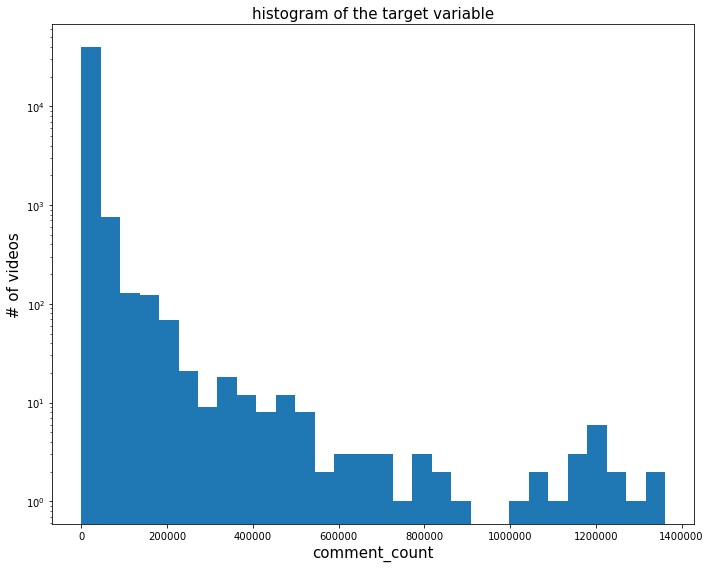

In [14]:
plt.figure(figsize=(10,8))

# draw on the figure, define the properties of the line or marker
# plt.hist(y,bins=30,log=True)
df['comment_count'].hist(bins=30,log=True,grid=False)

# modify the properties of the figure
# axis labels, title, x and y limits, etc.
plt.xlabel('comment_count', fontsize = 15)
plt.ylabel('# of videos', fontsize = 15)
plt.title('histogram of the target variable', fontsize = 15)
plt.tight_layout()

# show the figure in the notebook or save it as a file
plt.savefig('figures/y_hist.png',dpi=300)
plt.show()

Entertainment               0.243327
Music                       0.158050
How to and Style            0.101248
Comedy                      0.084422
People and Blogs            0.078390
News and Politics           0.060734
Science and Technology      0.058634
Film and Animation          0.057266
Sport                       0.053090
Education                   0.040441
Pets and Animals            0.022467
Gaming                      0.019952
Travel and Events           0.009817
Cars and Vehicles           0.009378
Shows                       0.001392
Non Profits and Activism    0.001392
Name: category_name, dtype: float64


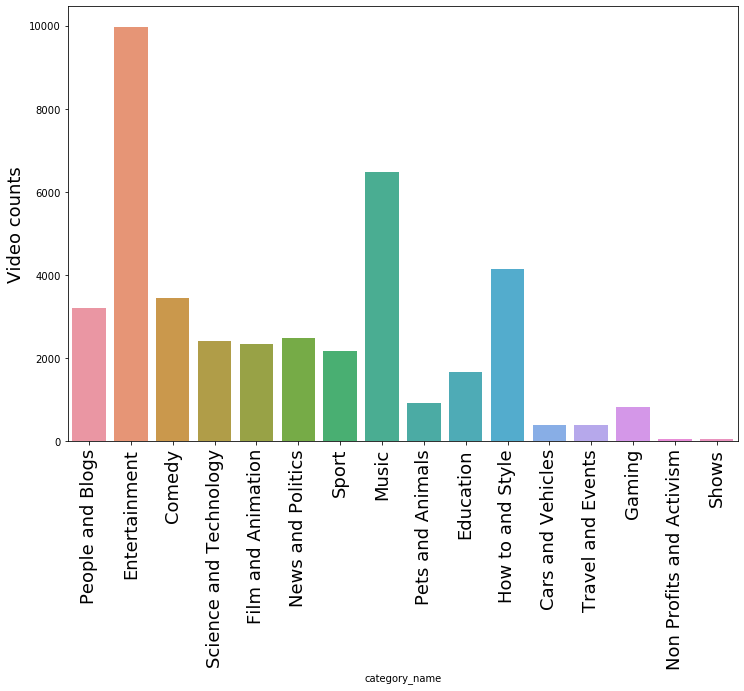

In [15]:
# which categories are easier to be trending videos
# print(df['category_name'].value_counts())
print(df['category_name'].value_counts()/df['category_name'].shape)
# pd.value_counts(df['category_name'], normalize=True).plot.bar()
plt.figure(figsize=(12,8))
p = sns.countplot(data=df, x = 'category_name')
p.set_xticklabels(p.get_xticklabels(), rotation = 90, fontsize = 18)
plt.ylabel('Video counts', fontsize=18)
plt.savefig('figures/category_count.png',dpi=300, bbox_inches = 'tight')
plt.show()

# <font color = maroon>TO ASK</font> #  
view_log should have the most strong correlatioin

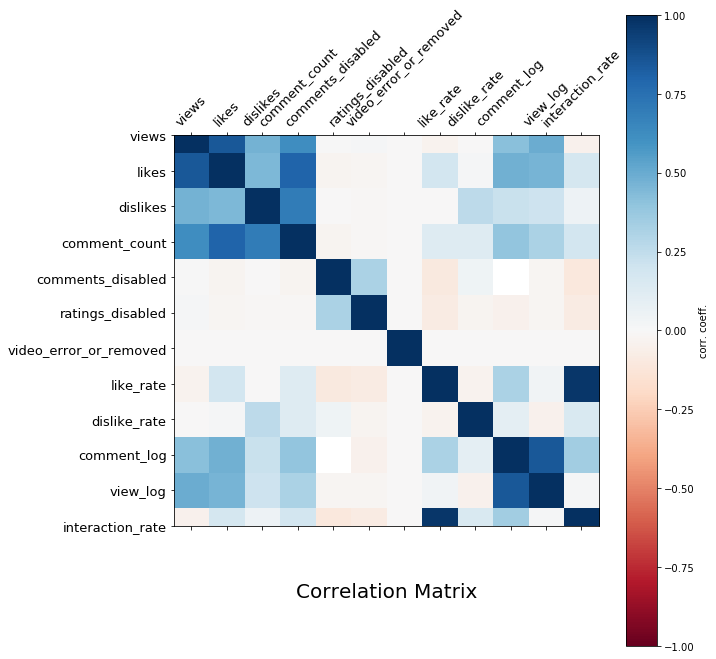

In [16]:
plt.figure(figsize=(10,10))
# plt.matshow(df.corr(),vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.matshow(df.corr(),vmin=-1,vmax=1,cmap=plt.cm.RdBu,fignum=0)

plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(df.corr().shape[0]),list(df.corr().columns),rotation=45, fontsize = 13)
plt.yticks(np.arange(df.corr().shape[0]),list(df.corr().columns),fontsize = 13)
plt.tight_layout()
plt.title('Correlation Matrix', y=-0.2, fontsize=20)
plt.savefig('figures/corr_coeff.png',dpi=300, bbox_inches = 'tight')
plt.show()

# print(df.corr().shape[0])

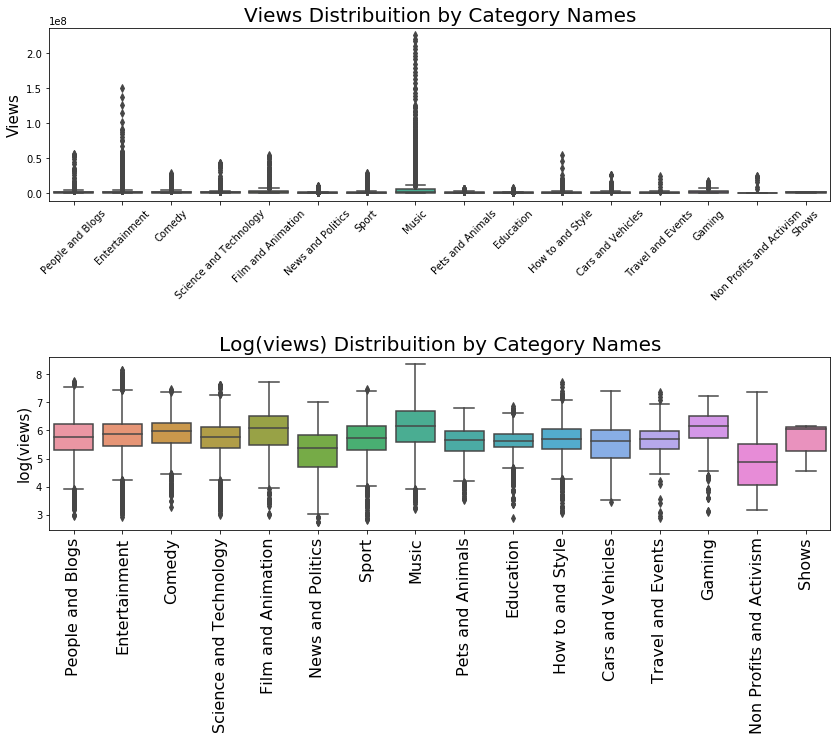

In [23]:
plt.figure(figsize = (14,9))
plt.subplot(211)
f2 = sns.boxplot(x='category_name', y='views', data=df)
f2.set_xticklabels(f2.get_xticklabels(),rotation=45)
f2.set_title("Views Distribuition by Category Names", fontsize=20)
f2.set_xlabel("", fontsize=15)
f2.set_ylabel("Views", fontsize=15)

plt.subplot(212)
f = sns.boxplot(x='category_name', y='view_log', data=df)
f.set_xticklabels(f.get_xticklabels(),rotation=90, fontsize = 16)
f.set_title("Log(views) Distribuition by Category Names", fontsize=20)
f.set_xlabel("", fontsize=15)
f.set_ylabel("log(views)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.savefig('figures/view_category.png',dpi=300, bbox_inches = 'tight')
plt.show()

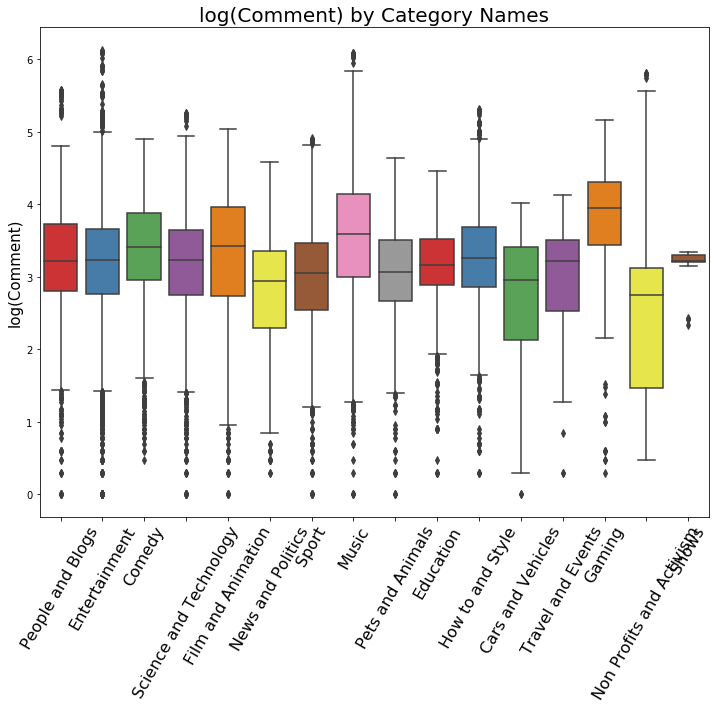

In [26]:
plt.figure(figsize = (12,9))

g2 = sns.boxplot(x='category_name', y='comment_log', data=df, palette="Set1")
g2.set_xticklabels(g2.get_xticklabels(),rotation=60, fontsize = 16)
g2.set_title("log(Comment) by Category Names", fontsize=20)
g2.set_xlabel("", fontsize=15)
g2.set_ylabel("log(Comment)", fontsize=15)
plt.savefig('figures/log_comment_category.png',dpi=300, bbox_inches = 'tight')
plt.show()

In [ ]:
action = df.sort_values('interaction_rate',ascending=False)
action_df = pd.DataFrame(data = action)
action_df = action_df[['title', 'category_name', 'interaction_rate']]
action_df[:10]